In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error


import pandas as pd
df = pd.read_csv("AirPassengers - AirPassengers.csv", parse_dates=['Month'], index_col='Month')
data = df['#Passengers']

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

def calc_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

In [3]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

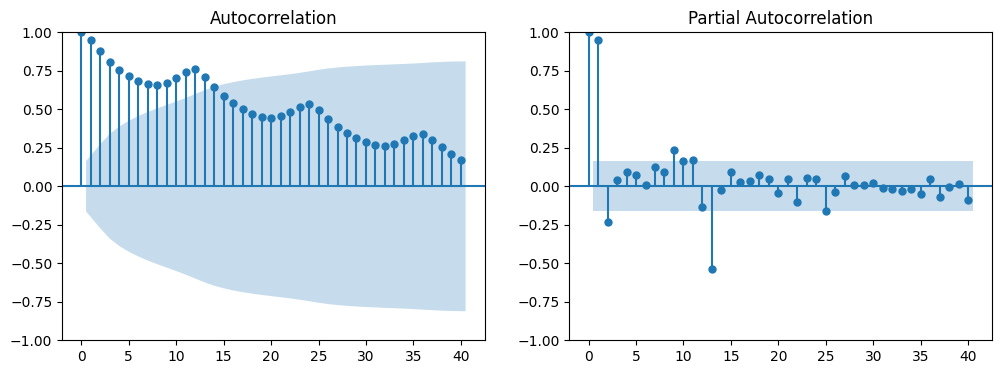

C:\Users\Quest\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Quest\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Quest\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Quest\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Quest\AppData\Local

MA(1) AIC: 1232.9167281995713
MA(3) AIC: 1113.4620643410135
MA(1) Metrics: {'MAE': 195.31386333938087, 'MSE': 44249.27672875952, 'RMSE': 210.35512051946708}
MA(3) Metrics: {'MAE': 182.09339808649963, 'MSE': 41630.991773173584, 'RMSE': 204.036741233469}


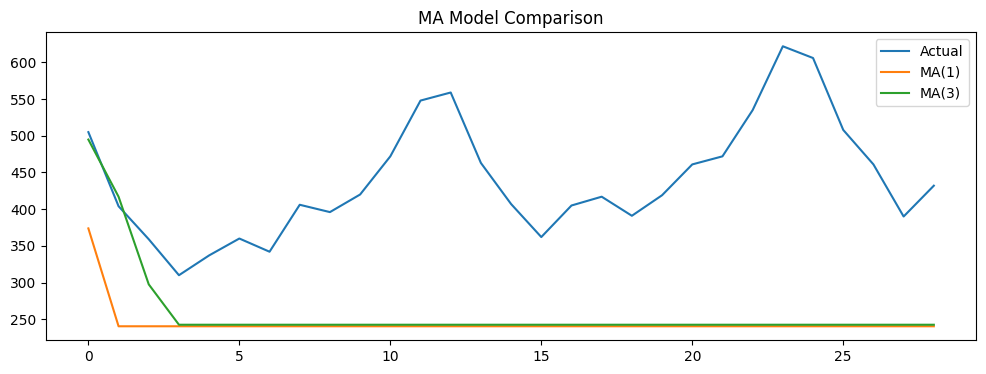

In [4]:
# ============================================================================
# LAB 8: MA MODEL
# ============================================================================

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# i. Plot ACF and PACF (already done in Lab 6)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(data.dropna(), lags=40, ax=axes[0])
plot_pacf(data.dropna(), lags=40, ax=axes[1])
plt.show()

# ii. Fit MA(1) model
ma1_model = ARIMA(train, order=(0, 0, 1)).fit()
ma1_pred = ma1_model.forecast(steps=len(test))
print(f"MA(1) AIC: {ma1_model.aic}")

# iii. Fit higher lag MA model
ma3_model = ARIMA(train, order=(0, 0, 3)).fit()
ma3_pred = ma3_model.forecast(steps=len(test))
print(f"MA(3) AIC: {ma3_model.aic}")

# iv. Compare performances
print("MA(1) Metrics:", calc_metrics(test, ma1_pred))
print("MA(3) Metrics:", calc_metrics(test, ma3_pred))

plt.figure(figsize=(12, 4))
plt.plot(test.values, label='Actual')
plt.plot(ma1_pred.values, label='MA(1)')
plt.plot(ma3_pred.values, label='MA(3)')
plt.legend()
plt.title('MA Model Comparison')
plt.show()